In [ ]:
import pandas as pd

# Load the car price dataset (replace 'path_to_your_dataset.csv' with your actual file path)
car_data = pd.read_csv('/content/car data.csv')

# Display the first few rows of the dataset
print(car_data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Check the structure and types of data
print(car_data.info())

# Check for missing values
print(car_data.isnull().sum())

# Summary statistics
print(car_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2

In [ ]:
# Apply one-hot encoding to categorical features
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [ ]:
X = car_data_encoded.drop(['Selling_Price', 'Car_Name'], axis=1)  # Drop target and irrelevant columns
y = car_data_encoded['Selling_Price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the car prices for the test set
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 0.906082658716206
R² Score: 0.9643601062650229


Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R^2 Score: {r2_dt}')


Decision Tree Mean Squared Error: 1.2853360655737704
Decision Tree R^2 Score: 0.9442021510484521


Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R^2 Score: {r2_gb}')


Gradient Boosting Mean Squared Error: 0.8713808495769999
Gradient Boosting R^2 Score: 0.9621724011904509


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


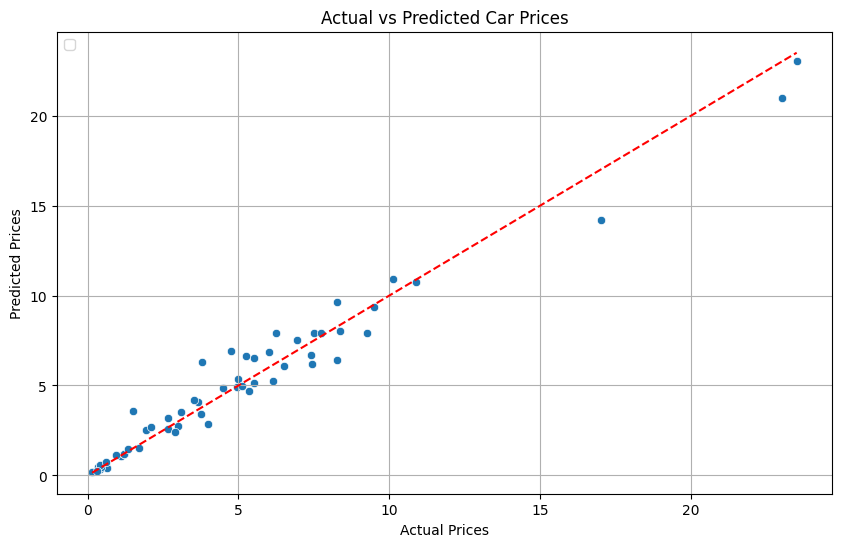

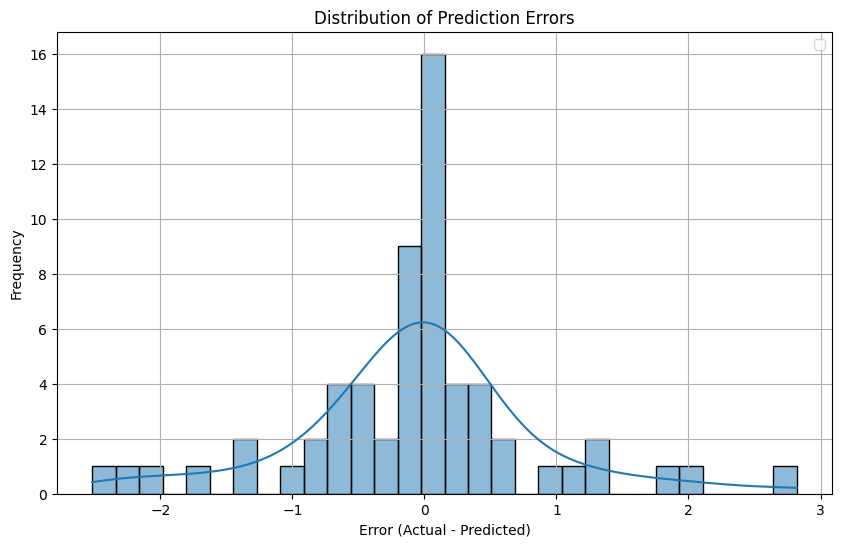

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined
# Create a DataFrame for actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot for Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         'r--')  # Line for perfect prediction
plt.grid()
plt.show()

# Calculate errors
results['Error'] = results['Actual'] - results['Predicted']

# Plot the distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(results['Error'], bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample new data (features): 'Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type', 'Selling_type', 'Transmission'
new_data = pd.DataFrame({
    'Year': [2020],               # Example Year
    'Present_Price': [7.5],        # Example Present Price (in lakhs)
    'Driven_kms': [15000],         # Example Kilometers Driven
    'Owner': [0],                  # Example Owner (0 = first owner)
    'Fuel_Type_Petrol': [1],       # Example Fuel Type (1 = Petrol, 0 = Diesel)
    'Fuel_Type_Diesel': [0],       # Example Diesel flag
    'Selling_type_Dealer': [1],    # Example Seller Type (1 = Dealer)
    'Selling_type_Individual': [0],# Example Seller Type (0 = Individual)
    'Transmission_Manual': [1]     # Example Transmission (1 = Manual, 0 = Automatic)
})
scaler = StandardScaler()  # Create a StandardScaler object

# Fit the scaler only to the numerical features used in training
scaler.fit(X_train[['Year', 'Present_Price', 'Driven_kms', 'Owner']])

# Transform the numerical features in the new data
new_data_scaled = scaler.transform(new_data[['Year', 'Present_Price', 'Driven_kms', 'Owner']])

# Create the final new data with the correct number of features
# Ensure the order and selection of features match the training data
# Get the feature names from the training data
feature_names = X_train.columns.tolist()

# Create a DataFrame for the new data using the correct feature names
final_new_data = pd.DataFrame(new_data_scaled, columns=feature_names[:4])  # Assuming the first 4 features are numerical

# Add the remaining categorical features (adjust column names if necessary)
for col in feature_names[4:]:
    final_new_data[col] = new_data[col] if col in new_data else 0  # Handle missing columns

# Predict the car price using the trained Random Forest model
predicted_price = rf_model.predict(final_new_data)

# Output the predicted price
print(f"The predicted selling price of the car is: {predicted_price[0]:.2f} lakhs")

The predicted selling price of the car is: 0.58 lakhs
